*Eduardus Tjitrahardja | @edutjie | 2022*

# Final Project: Breast Cancer Classifier

## Import Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

from catboost import CatBoostClassifier

SEED = 10

In [52]:
plt.style.use('seaborn')

## Load Dataset

In [2]:
breast_cancer = load_breast_cancer()
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [20]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
df = pd.DataFrame(data=breast_cancer['data'], columns=breast_cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [9]:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension'],
      dtype='object')

In [8]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

![Malignnant Vs. Benign](../images/malignant_vs_benign.png "Malignnant Vs. Benign")

In [11]:
df['diagnosis'] = breast_cancer.target_names[breast_cancer.target]
df.diagnosis.value_counts()

benign       357
malignant    212
Name: diagnosis, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              569 non-null    float64
 1   mean_texture             569 non-null    float64
 2   mean_perimeter           569 non-null    float64
 3   mean_area                569 non-null    float64
 4   mean_smoothness          569 non-null    float64
 5   mean_compactness         569 non-null    float64
 6   mean_concavity           569 non-null    float64
 7   mean_concave_points      569 non-null    float64
 8   mean_symmetry            569 non-null    float64
 9   mean_fractal_dimension   569 non-null    float64
 10  radius_error             569 non-null    float64
 11  texture_error            569 non-null    float64
 12  perimeter_error          569 non-null    float64
 13  area_error               569 non-null    float64
 14  smoothness_error         5

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean_texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean_perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean_area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean_smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean_compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean_concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean_concave_points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean_symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean_fractal_dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [35]:
cat_cols = df.select_dtypes(include=['object']).columns.to_list()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.to_list()

print(f"Category Columns: {cat_cols}")
print(f"Numeric Columns: {num_cols}")

Category Columns: ['diagnosis']
Numeric Columns: ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity', 'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension', 'radius_error', 'texture_error', 'perimeter_error', 'area_error', 'smoothness_error', 'compactness_error', 'concavity_error', 'concave_points_error', 'symmetry_error', 'fractal_dimension_error', 'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area', 'worst_smoothness', 'worst_compactness', 'worst_concavity', 'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension']


## Data Cleaning

### Check Empty Values

In [31]:
df.isnull().any()

mean_radius                False
mean_texture               False
mean_perimeter             False
mean_area                  False
mean_smoothness            False
mean_compactness           False
mean_concavity             False
mean_concave_points        False
mean_symmetry              False
mean_fractal_dimension     False
radius_error               False
texture_error              False
perimeter_error            False
area_error                 False
smoothness_error           False
compactness_error          False
concavity_error            False
concave_points_error       False
symmetry_error             False
fractal_dimension_error    False
worst_radius               False
worst_texture              False
worst_perimeter            False
worst_area                 False
worst_smoothness           False
worst_compactness          False
worst_concavity            False
worst_concave_points       False
worst_symmetry             False
worst_fractal_dimension    False
diagnosis 

**Observations:**
- There's no empty values

### Check Outliers

In [33]:
df.shape

(569, 31)

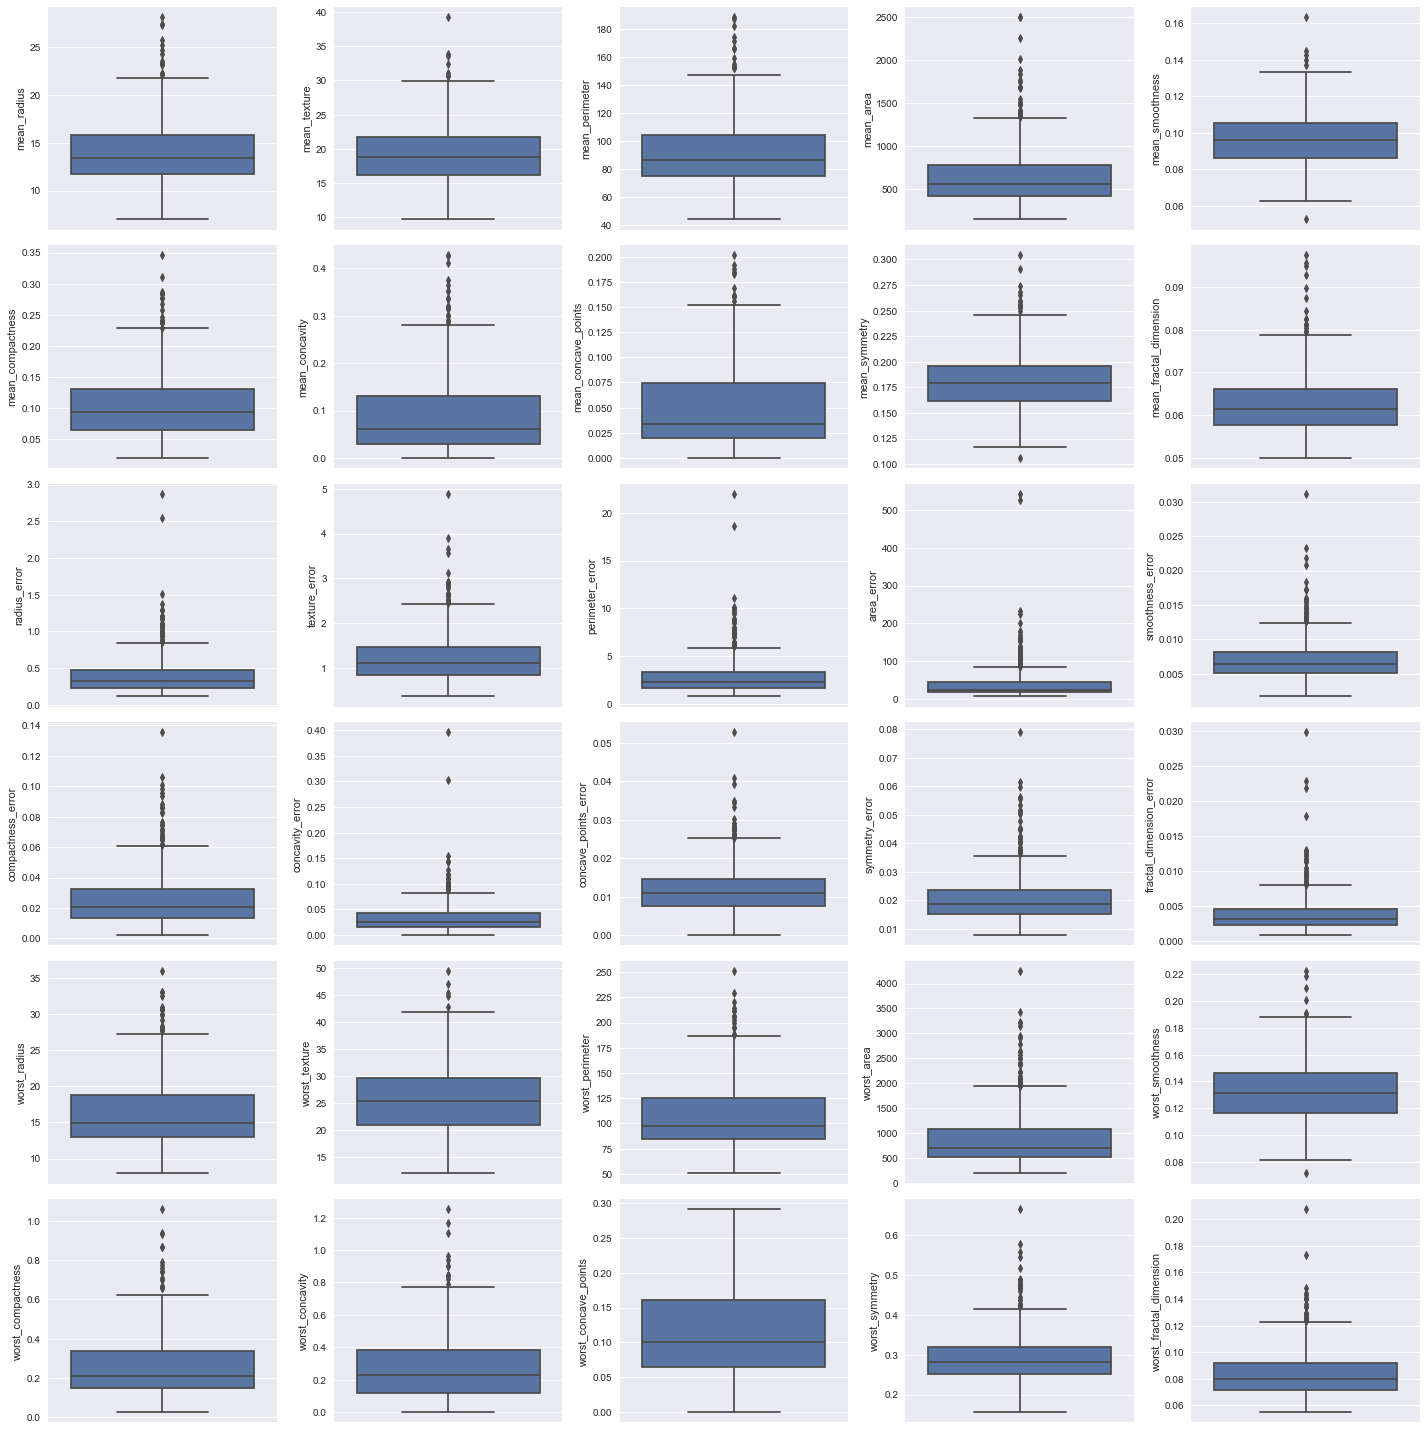

In [53]:
fig, axes = plt.subplots(6, 5, figsize=(20, 20))

for i, col in enumerate(num_cols):
    sns.boxplot(y=col, data=df, ax=axes[i//5, i%5])
plt.tight_layout()

**Observations:**
- There are maybe some outliers
- Let's check deeper!

In [40]:
outliers_index = []
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = df[(df[col] < q1 - (1.5 * iqr)) | (df[col] > q3 + (1.5 * iqr))]
    outliers_index.extend(outliers.index.to_list())
    outliers_percentage = (len(outliers.index.to_list()) / len(df)) * 100
    if outliers_percentage > 0:
        print(f"{col} Outliers Percentage: {round(outliers_percentage, 2)}%")

mean_radius Outliers Percentage: 2.46%
mean_texture Outliers Percentage: 1.23%
mean_perimeter Outliers Percentage: 2.28%
mean_area Outliers Percentage: 4.39%
mean_smoothness Outliers Percentage: 1.05%
mean_compactness Outliers Percentage: 2.81%
mean_concavity Outliers Percentage: 3.16%
mean_concave_points Outliers Percentage: 1.76%
mean_symmetry Outliers Percentage: 2.64%
mean_fractal_dimension Outliers Percentage: 2.64%
radius_error Outliers Percentage: 6.68%
texture_error Outliers Percentage: 3.51%
perimeter_error Outliers Percentage: 6.68%
area_error Outliers Percentage: 11.42%
smoothness_error Outliers Percentage: 5.27%
compactness_error Outliers Percentage: 4.92%
concavity_error Outliers Percentage: 3.87%
concave_points_error Outliers Percentage: 3.34%
symmetry_error Outliers Percentage: 4.75%
fractal_dimension_error Outliers Percentage: 4.92%
worst_radius Outliers Percentage: 2.99%
worst_texture Outliers Percentage: 0.88%
worst_perimeter Outliers Percentage: 2.64%
worst_area Outl

In [43]:
outliers_counter = {i: outliers_index.count(i) for i in set(outliers_index)}
print(outliers_counter)

{0: 8, 1: 1, 2: 1, 3: 11, 4: 1, 5: 1, 520: 3, 521: 9, 9: 8, 8: 1, 12: 10, 14: 4, 15: 3, 528: 2, 18: 2, 533: 1, 22: 3, 23: 5, 24: 2, 25: 4, 535: 1, 27: 2, 537: 1, 538: 1, 30: 1, 539: 3, 26: 3, 33: 1, 31: 2, 34: 2, 35: 1, 38: 3, 553: 1, 42: 9, 41: 1, 556: 1, 557: 1, 559: 1, 561: 2, 562: 5, 563: 6, 564: 5, 565: 2, 53: 1, 567: 7, 568: 1, 56: 2, 60: 2, 62: 1, 63: 1, 68: 9, 70: 1, 71: 4, 72: 2, 76: 1, 77: 3, 78: 13, 82: 12, 83: 2, 95: 1, 105: 2, 108: 17, 110: 1, 111: 1, 112: 4, 116: 3, 118: 1, 119: 2, 121: 1, 122: 18, 136: 1, 138: 5, 145: 1, 146: 3, 147: 1, 150: 1, 151: 3, 152: 10, 156: 1, 161: 4, 162: 2, 164: 6, 168: 3, 173: 1, 176: 6, 180: 9, 181: 4, 185: 1, 190: 9, 192: 3, 196: 1, 199: 1, 202: 8, 203: 2, 210: 4, 212: 13, 213: 5, 214: 2, 218: 4, 219: 5, 229: 1, 232: 1, 236: 9, 239: 2, 242: 3, 245: 2, 250: 6, 252: 3, 254: 1, 256: 2, 257: 1, 258: 9, 259: 2, 262: 2, 265: 9, 272: 7, 273: 1, 275: 1, 288: 4, 290: 6, 300: 4, 302: 3, 314: 3, 318: 3, 323: 3, 329: 1, 332: 2, 335: 2, 337: 1, 339: 9, 

#### Drop Outliers

In [ ]:
print("Shape before dropping outliers:", df.shape)
df.drop([i for i, count in outliers_counter.items() if count > 2], axis=0, inplace=True)
print("Shape after dropping outliers:", df.shape)

## EDA

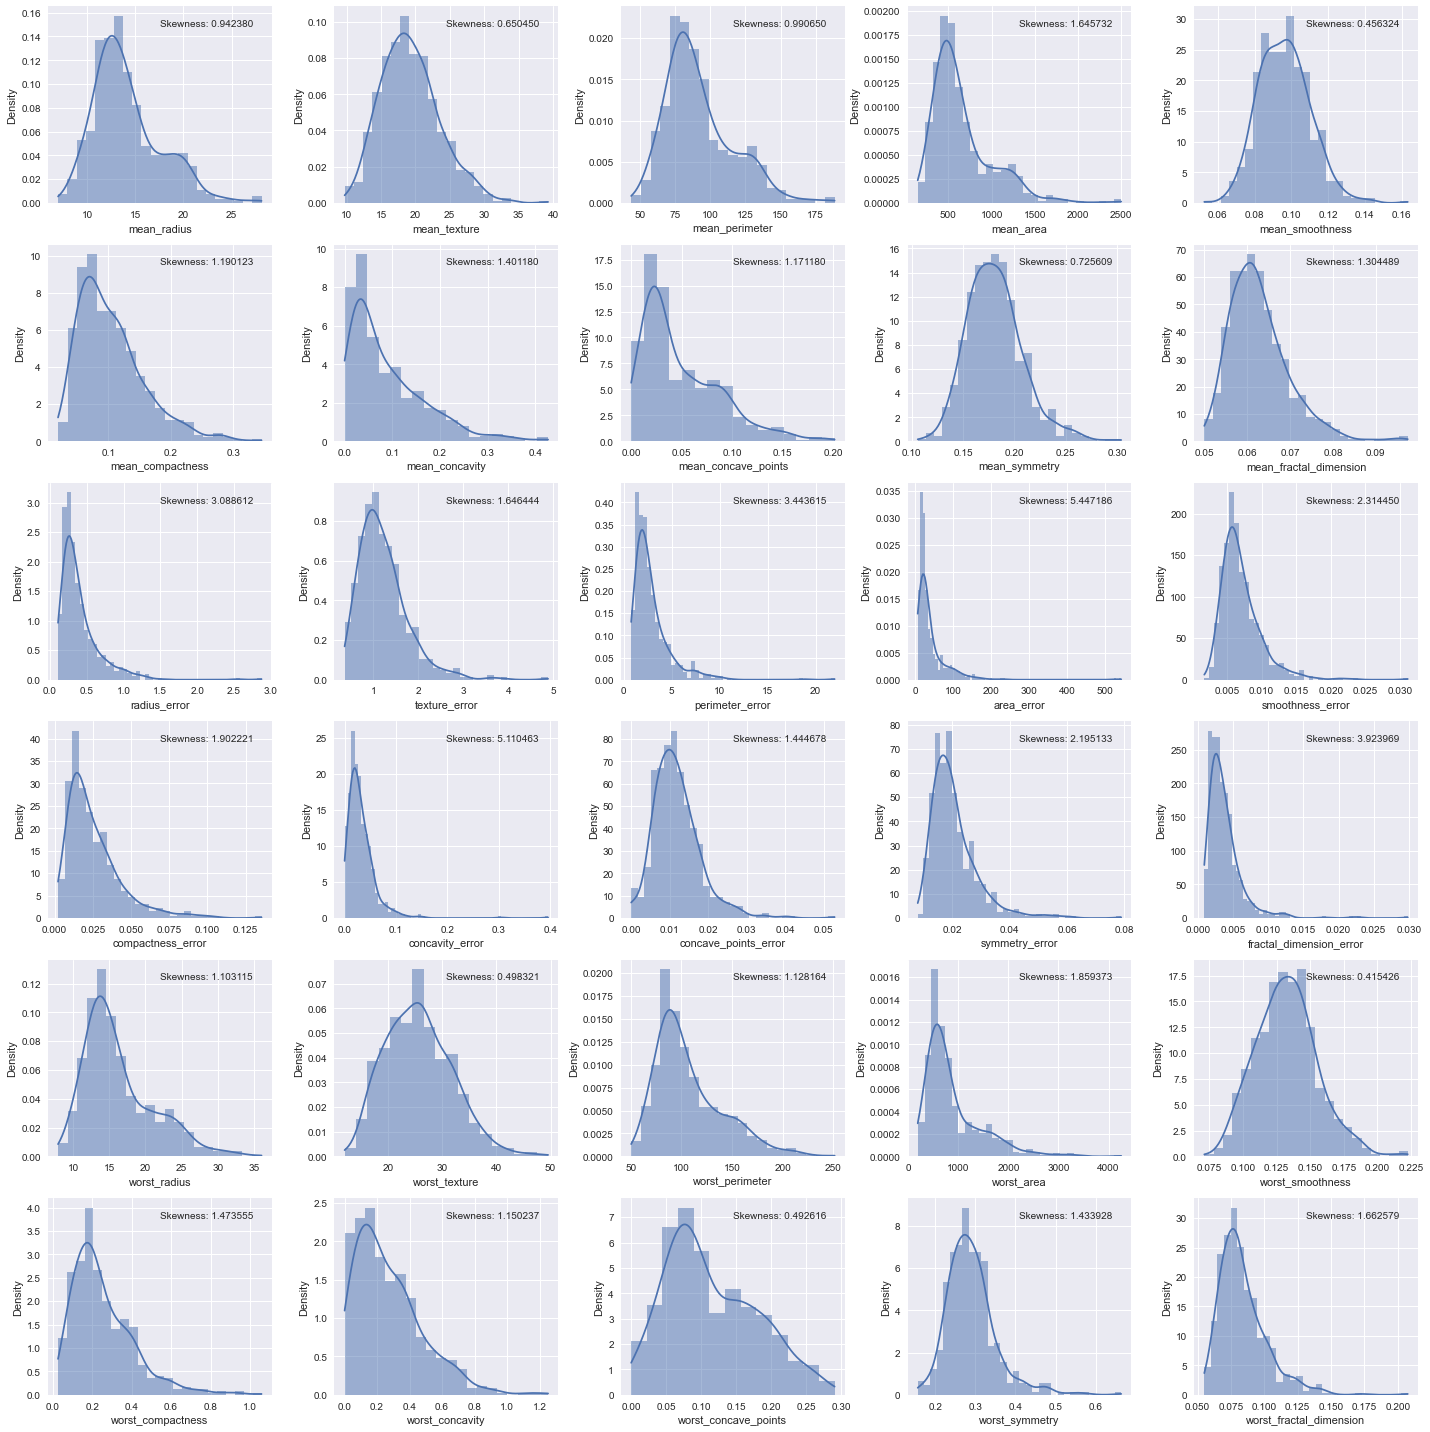

In [54]:
fig, axes = plt.subplots(6, 5, figsize=(20, 20))

for i, col in enumerate(num_cols):
    sns.histplot(x=col, data=df, ax=axes[i//5, i%5], kde=True, stat="density", linewidth=0)
    axes[i // 5, i % 5].text(
        x=0.5,
        y=0.9,
        transform=axes[i // 5, i % 5].transAxes,
        s="Skewness: %f" % df.iloc[:, i].skew(),
    )
plt.tight_layout()

**Observations:**
- There are many features that are right skewed

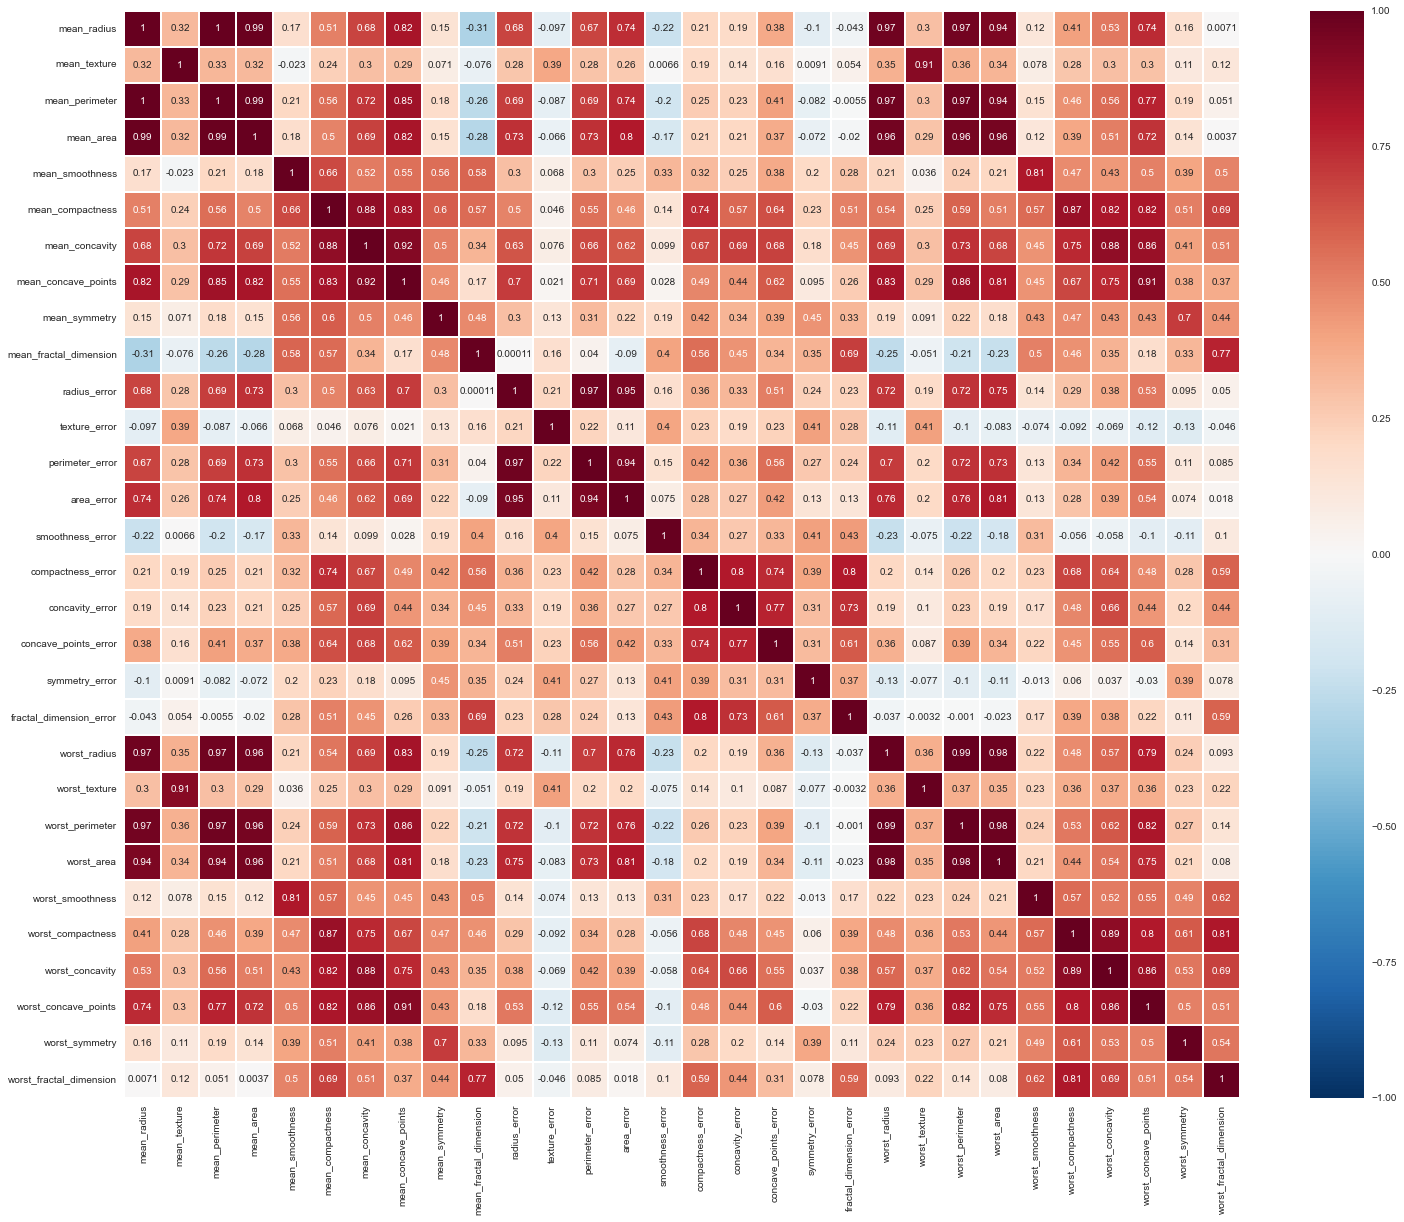

In [55]:
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(), annot=True, cmap="RdBu_r", linewidths=0.2, vmax=1.0, vmin=-1.0)
plt.show()

In [ ]:
threshold = 0.85
